In [2]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
print('X_train :', X_train.shape)
print('Y_train :', Y_train.shape)
print('X_test :', X_test.shape)
print('Y_test :', Y_test.shape)

X_train : (60000, 28, 28)
Y_train : (60000,)
X_test : (10000, 28, 28)
Y_test : (10000,)


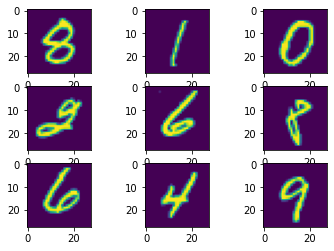

In [4]:
import matplotlib.pyplot as plt
from random import randint
for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(X_train[i+randint(0,59990)])
plt.show()

In [0]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [0]:
from keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [7]:
Y_train[567]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [0]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
X_train[234,12]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.14509804],
       [0.97254902],
       [0.99607843],
       [0.35686275],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00784314],
       [0.45882353],
       [0.98039216],
       [0.63921569],
       [0.35686275],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [0]:
def define_model():
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, kernel_size = (2, 2), activation = 'relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(256, kernel_size = (2, 2), activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(1024, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))
    
    opt = SGD(learning_rate = 0.01, momentum = 0.9)
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [0]:
def define_model2():

	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
 
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 
	return model

In [0]:
from sklearn.model_selection import KFold

In [0]:
def evaluate_model(X_data, Y_data, n_folds = 5):
    
    scores, histories = list(), list()
    
    kFold = KFold(n_folds, shuffle = True)
    
    for i_train, i_test in kFold.split(X_data):
        model = define_model()
        X_train, Y_train, X_test, Y_test = X_data[i_train], Y_data[i_train], X_data[i_test], Y_data[i_test]
        
        history = model.fit(X_train, Y_train, epochs = 10, batch_size = 32, validation_data = (X_test, Y_test), verbose = 1)
        _, acc = model.evaluate(X_test, Y_test, verbose = 1)
        print('> %.3f' % (acc*100.0))
        
        scores.append(acc)
        histories.append(history)
        
    return scores, histories

In [16]:
scores, histories = evaluate_model(X_train, Y_train)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 18s 367us/step - loss: 0.1411 - accuracy: 0.9559 - val_loss: 0.0561 - val_accuracy: 0.9822
Epoch 2/10
48000/48000 [==============================] - 12s 250us/step - loss: 0.0460 - accuracy: 0.9859 - val_loss: 0.0595 - val_accuracy: 0.9828
Epoch 3/10
48000/48000 [==============================] - 12s 251us/step - loss: 0.0308 - accuracy: 0.9904 - val_loss: 0.0375 - val_accuracy: 0.9880
Epoch 4/10
48000/48000 [==============================] - 12s 259us/step - loss: 0.0227 - accuracy: 0.9927 - val_loss: 0.0392 - val_accuracy: 0.9883
Epoch 5/10
48000/48000 [==============================] - 12s 251us/step - loss: 0.0157 - accuracy: 0.9948 - val_loss: 0.0502 - val_accuracy: 0.9868
Epoch 6/10
48000/48000 [==============================] - 12s 252us/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 0.0481 - val_accuracy: 0.9871
Epoch 7/10
48000/48000 [==============================] 

In [0]:
from numpy import mean
from numpy import std
def performance(scores, histories):
    
    for i in range(len(histories)):
        
        plt.subplot(2,2,1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color = 'blue', label = 'train')
        plt.plot(histories[i].history['val_loss'], color = 'red', label = 'test')
        
        plt.subplot(2,2,2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color = 'blue', label = 'train')
        plt.plot(histories[i].history['val_accuracy'], color = 'red', label = 'test')
        
    plt.show()

    print('Accuracy: \nMean = %.3f, std = %.3f, n = %d' % (mean(scores)*100, std(scores)*100, len(scores)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


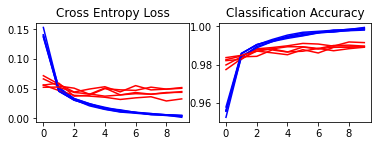

Accuracy: 
Mean = 98.990, std = 0.086, n = 5


In [18]:
performance(scores, histories)

In [0]:
def load_dataset():
    
    (X_train_orig, Y_train_orig), (X_test_orig, Y_test_orig) = mnist.load_data()
    
    X_train = X_train_orig.reshape((X_train_orig.shape[0], 28, 28, 1))
    X_test = X_test_orig.reshape((X_test_orig.shape[0], 28, 28, 1))
    
    Y_train = to_categorical(Y_train_orig)
    Y_test = to_categorical(Y_test_orig)
    
    return X_train, Y_train, X_test, Y_test

In [0]:
def preprocessing(X_train, X_test):
    
    X_train = X_train.astype('float')
    X_test = X_test.astype('float')

    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    return X_train, X_test

In [0]:
def run_all():

  X_train, Y_train, X_test, Y_test = load_dataset()
  X_train, X_test = preprocessing(X_train, X_test)
  scores, histories = evaluate_model(X_train, Y_train)
  performance(scores, histories)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 15s 322us/step - loss: 0.1492 - accuracy: 0.9525 - val_loss: 0.0659 - val_accuracy: 0.9795
Epoch 2/10
48000/48000 [==============================] - 15s 317us/step - loss: 0.0423 - accuracy: 0.9868 - val_loss: 0.0435 - val_accuracy: 0.9881
Epoch 3/10
48000/48000 [==============================] - 15s 317us/step - loss: 0.0268 - accuracy: 0.9915 - val_loss: 0.0430 - val_accuracy: 0.9883
Epoch 4/10
48000/48000 [==============================] - 15s 318us/step - loss: 0.0177 - accuracy: 0.9942 - val_loss: 0.0375 - val_accuracy: 0.9904
Epoch 5/10
48000/48000 [==============================] - 15s 317us/step - loss: 0.0112 - accuracy: 0.9967 - val_loss: 0.0463 - val_accuracy: 0.9884
Epoch 6/10
48000/48000 [==============================] - 15s 316us/step - loss: 0.0092 - accuracy: 0.9968 - val_loss: 0.0454 - val_accuracy: 0.9894
Epoch 7/10
48000/48000 [==============================] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


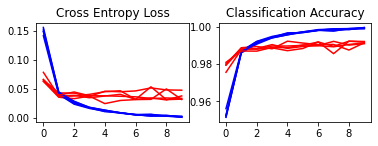

Accuracy: 
Mean = 99.150, std = 0.039, n = 5


In [24]:
run_all()

In [41]:
import os
try:
  device_name = os.environ['COLAB_TPU_ADDR']
  TPU_ADDRESS = 'grpc://' + device_name
  print('Found TPU at: {}'.format(TPU_ADDRESS))

except KeyError:
  print('TPU not found')

Found TPU at: grpc://10.57.255.178:8470


In [42]:
import tensorflow as tf

import os
import tensorflow_datasets as tfds

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

INFO:tensorflow:Initializing the TPU system: grpc://10.57.255.178:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.57.255.178:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU')]


In [1]:
import tensorflow as tf
from keras import backend as K
import keras.backend.tensorflow_backend as tfback

print("tf.__version__ is", tf.__version__)
print("tf.keras.__version__ is:", tf.keras.__version__)

def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list of available GPU devices.
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus


K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


tf.__version__ is 2.2.0
tf.keras.__version__ is: 2.3.0-tf


['/device:GPU:0']

In [26]:
model = define_model()
model.fit(X_train, Y_train, epochs = 20, batch_size = 32, verbose = 1)

Epoch 1/20
60000/60000 [==============================] - 17s 290us/step - loss: 0.1249 - accuracy: 0.9600
Epoch 2/20
60000/60000 [==============================] - 17s 290us/step - loss: 0.0395 - accuracy: 0.9878
Epoch 3/20
60000/60000 [==============================] - 17s 291us/step - loss: 0.0231 - accuracy: 0.9929
Epoch 4/20
60000/60000 [==============================] - 17s 285us/step - loss: 0.0176 - accuracy: 0.9940
Epoch 5/20
60000/60000 [==============================] - 17s 290us/step - loss: 0.0117 - accuracy: 0.9961
Epoch 6/20
60000/60000 [==============================] - 17s 285us/step - loss: 0.0082 - accuracy: 0.9974
Epoch 7/20
60000/60000 [==============================] - 17s 286us/step - loss: 0.0069 - accuracy: 0.9977
Epoch 8/20
60000/60000 [==============================] - 17s 290us/step - loss: 0.0052 - accuracy: 0.9984
Epoch 9/20
60000/60000 [==============================] - 17s 289us/step - loss: 0.0030 - accuracy: 0.9990
Epoch 10/20
60000/60000 [============

In [0]:
model.save('Final.h5')

In [28]:
_, acc = model.evaluate(X_test, Y_test, verbose = 1)

10000/10000 [==============================] - 1s 146us/step


In [31]:
print('Test Accuracy: %.3f' % (acc*100))

Test Accuracy: 99.280


In [0]:
import numpy as np
import cv2

In [0]:
def prediction_preprocessing(filename):
  img2 = cv2.imread(filename)
  gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  res = cv2.resize(gray, dsize=(28,28), interpolation=cv2.INTER_CUBIC)

  img = res.reshape(1, 28, 28, 1)
  img = img.astype('float')
  img = img / 255.0

  plt.imshow(img2)

  return img

In [0]:
"""
def prediction_preprocessing(filename):
  image = load_img(filename, color_mode = 'grayscale')
  image = img_to_array(image)
  image = image.reshape(image.shape[0],image.shape[1])

  width, height = image.shape[1], image.shape[0]
  img = np.array(image)
  offset  = int(abs(height-width)/2)
  a = (height-width)%2
  if width>height:
      img = img[:,offset:(width-offset)]
      if a:
        img = img[:, 1:]
  else:
      img = img[offset:(height-offset),:]
      if a:
        img = img[1:, :]
"""

In [0]:
def prediction(filename):

  img = prediction_preprocessing(filename)

  model = load_model('Final.h5')     # If you have not run the above cells to train the model, use this trained model
  digit = model.predict_classes(img)

  print('Predicted Output: ', digit)

Predicted Output:  [5]


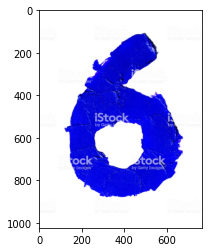

In [165]:
prediction('new3.jpg')

In [0]:
"""
import cv2

img2 = cv2.imread('lol.jpg')
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
res = cv2.resize(gray, dsize=(28,28), interpolation=cv2.INTER_CUBIC)

rgb_weights = [0.2989, 0.5870, 0.1140]
img_g = np.dot(res[...,:3], rgb_weights)
"""